In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/weatheraus/weatherAUS.csv


Günlük nem oranı hesaplamak için gün içindeki nem oranlarının ortalamasını alan fonksiyon

In [2]:
def humidityAvg(humidityAM, humidityPM):
    humidity = []
    for i in range(len(humidityPM)):
        humidity.append((humidityAM[i]+humidityPM[i])/2)
    humidity = np.array(humidity)
    return humidity

In [3]:
datafile = pd.read_csv("../input/weatheraus/weatherAUS.csv")

**Veri Analizi**

In [4]:
datafile.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2009-01-01,Albury,11.3,26.5,0.0,NaN,NaN,WNW,56.0,W,...,46.0,26.0,1004.5,1003.2,NaN,NaN,19.7,25.7,No,No
1,2009-01-02,Albury,9.6,23.9,0.0,NaN,NaN,W,41.0,WSW,...,44.0,22.0,1014.4,1013.1,NaN,NaN,14.9,22.1,No,No
2,2009-01-03,Albury,10.5,28.8,0.0,NaN,NaN,SSE,26.0,SSE,...,43.0,22.0,1018.7,1014.8,NaN,NaN,17.1,26.5,No,No
3,2009-01-04,Albury,12.3,34.6,0.0,NaN,NaN,WNW,37.0,SSE,...,41.0,12.0,1015.1,1010.3,NaN,NaN,20.7,33.9,No,No
4,2009-01-05,Albury,12.9,35.8,0.0,NaN,NaN,WNW,41.0,ENE,...,41.0,9.0,1012.6,1009.2,NaN,NaN,22.4,34.4,No,No


In [5]:
datafile.shape

(145429, 23)

In [6]:
datafile.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

humidityAVG fonk çağrılması

In [7]:
humidity = humidityAvg(datafile["Humidity9am"].tolist(),datafile["Humidity3pm"].tolist())
datafile["humAvg"] = humidity

In [8]:
# Sınıflandırma için kullanılmayacak niteliklerin veri setinden çıkarılması
datafile = datafile.drop(["Sunshine","Evaporation","WindGustDir","WindGustSpeed","WindDir9am","WindDir3pm","WindSpeed9am","WindSpeed3pm","Humidity9am","Humidity3pm","Pressure9am","Pressure3pm","Cloud9am","Cloud3pm","RainTomorrow"], axis=1)


In [9]:
datafile.describe()

,MinTemp,MaxTemp,Rainfall,Temp9am,Temp3pm,humAvg
count,143944.000000,144168.000000,142169.000000,143662.000000,141820.000000,140155.000000
mean,12.193751,23.220473,2.361037,16.990199,21.682553,60.157469
std,6.398955,7.119290,8.478716,6.489219,6.936822,18.181012
min,-8.500000,-4.800000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,12.300000,16.600000,48.500000
50%,12.000000,22.600000,0.000000,16.700000,21.100000,61.500000
75%,16.900000,28.200000,0.800000,21.600000,26.400000,73.000000
max,33.900000,48.100000,371.000000,40.200000,46.700000,100.000000


Text(0.5, 1.0, 'Albury nem-yağış')

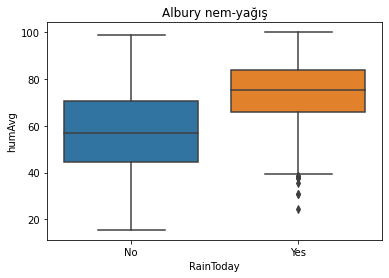

In [10]:
sns.boxplot(x = 'RainToday', y = 'humAvg', data = datafile[datafile["Location"] == "Albury"]).set_title("Albury nem-yağış")

Text(0.5, 1.0, 'Albury and Sydney nem-yağış')

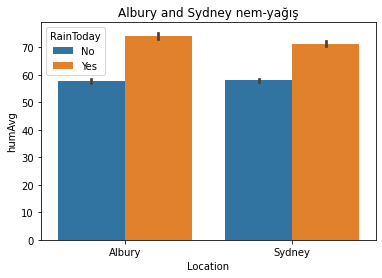

In [11]:
sns.barplot(x = 'Location', y = 'humAvg', data = datafile[np.logical_or(datafile["Location"] == "Albury", datafile["Location"] == "Sydney")], hue = 'RainToday').set_title("Albury and Sydney nem-yağış")


**Data pre-proccessing**

In [12]:
datafile.isnull().sum() # Eksik veri kontrolü

Date            0
Location        0
MinTemp      1485
MaxTemp      1261
Rainfall     3260
Temp9am      1767
Temp3pm      3609
RainToday    3260
humAvg       5274
dtype: int64

In [13]:
rainTodayCount = datafile['RainToday'].value_counts() # Bir nitelik için En sık geçen sınıfı bulma

In [14]:
rainTodayCount = rainTodayCount.fillna("no") # Eksik verileri sabit bir değer ile tamamlama

In [15]:
from sklearn.preprocessing import LabelEncoder # Kategorik verileri donusturme

In [16]:
LE = LabelEncoder()

datafile['RainTodayMap'] = datafile.RainToday.map({'NA':'no'})

datafile['Location_Cat'] = LE.fit_transform(datafile['Location'])
datafile['RainToday_Cat'] = LE.fit_transform(datafile['RainTodayMap'])

In [17]:
datafile.drop(["Date","Location","RainTodayMap","RainToday"], axis=1, inplace=True)

In [18]:
from sklearn.impute import KNNImputer  # Eksik verileri KNN algoritması ile tamamlama
imputer = KNNImputer(missing_values=np.nan, n_neighbors=5)

datafile[:] = imputer.fit_transform(datafile)

df = pd.DataFrame(datafile)

In [19]:
from sklearn.preprocessing import KBinsDiscretizer # Sürekli Verileri düzleştirme

In [20]:
Xbin = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile') # Nem oranini 10 degerden olusan kategorik veriye donusturme
df["humAvg"] = Xbin.fit_transform(df[["humAvg"]])

In [21]:
df ## Makine Öğrenimi Algoritmasının uygulanacağı veri seti

,MinTemp,MaxTemp,Rainfall,Temp9am,Temp3pm,humAvg,Location_Cat,RainToday_Cat
0,11.3,26.50,0.0,19.7,25.7,1.0,2.0,0.0
1,9.6,23.90,0.0,14.9,22.1,0.0,2.0,0.0
2,10.5,28.80,0.0,17.1,26.5,0.0,2.0,0.0
3,12.3,34.60,0.0,20.7,33.9,0.0,2.0,0.0
4,12.9,35.80,0.0,22.4,34.4,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...
145424,2.8,23.40,0.0,10.1,22.4,1.0,41.0,0.0
145425,3.6,25.30,0.0,10.9,24.5,1.0,41.0,0.0
145426,5.4,26.90,0.0,12.5,26.1,1.0,41.0,0.0
145427,7.8,27.00,0.0,15.1,26.0,1.0,41.0,0.0


**Prepare train & test set**

In [22]:
X = df.loc[:,:"Location_Cat"]  # Sadece niteliklerden olusan Veriseti
y = df.loc[:,"RainToday_Cat"] # Sinif etiketi

In [23]:
#Veri seti %70 train, %30 test olarak bölmek
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

**KNN ALGORITHM**

In [24]:
from sklearn.neighbors import KNeighborsClassifier # KNN algoritması ---------------------------------------------------
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski')

knn.fit(X_train, y_train.ravel())

KNeighborsClassifier()

In [25]:
# Modelin test verisi ile sınıflandırma yapması
result = knn.predict(X_test)
result

array([0., 0., 0., ..., 0., 0., 0.])

In [26]:
# Modelin Sınıflandırma tahmin başarısının gösterilmesi
from sklearn.metrics import accuracy_score #basari orani
accuracy = accuracy_score(y_test, result)
accuracy

1.0

> KNN Modelinin kaydedilip tekrar kullanılması

In [27]:
import pickle
with open('knnmodel.pkl', 'wb') as f:
    pickle.dump(knn, f)
knn_2 = pickle.load(open('knnmodel.pkl', 'rb'))
result2 = knn_2.predict(X_test)
result2

array([0., 0., 0., ..., 0., 0., 0.])

In [28]:
accuracy2 = accuracy_score(y_test, result2)
accuracy2

1.0

> KNN Karmaşıklık matrisi

In [29]:
from sklearn.metrics import confusion_matrix #karmasiklik matrisi
cm = confusion_matrix(y_test, result2, labels=[0,1])
cm

array([[43629,     0],
       [    0,     0]])

**Decision Tree ALGORITHM**

In [30]:
from sklearn.tree import DecisionTreeClassifier 
dtc = DecisionTreeClassifier(random_state=42)

dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
result = dtc.predict(X_test)
result

array([0., 0., 0., ..., 0., 0., 0.])

In [32]:
accuracy = accuracy_score(y_test, result) #basari orani
accuracy

1.0

> Decision Tree Modelinin kaydedilip tekrar kullanılması

In [33]:
import pickle
with open('dtcmodel.pkl', 'wb') as f:
    pickle.dump(knn, f)
dtc_2 = pickle.load(open('dtcmodel.pkl', 'rb'))
result2 = knn_2.predict(X_test)
result2

array([0., 0., 0., ..., 0., 0., 0.])

In [34]:
accuracy2 = accuracy_score(y_test, result2)
accuracy2

1.0

*Decision Tree karmaşıklık matrisi*

In [35]:
cm = confusion_matrix(y_test, result2, labels=[0,1])
cm

array([[43629,     0],
       [    0,     0]])

**NaiveBayes ALGORITHM(GaussianNB)**

In [36]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB()

gnb.fit(X_train, y_train.ravel())

GaussianNB()

In [37]:
result = gnb.predict(X_test)
result

array([0., 0., 0., ..., 0., 0., 0.])

In [38]:
accuracy = accuracy_score(y_test, result) #basari orani
accuracy

1.0

*NaiveBayes Modelinin kaydedilip tekrar kullanılması*

In [39]:
import pickle
with open('gnbmodel.pkl', 'wb') as f:
    pickle.dump(knn, f)
gnb_2 = pickle.load(open('gnbmodel.pkl', 'rb'))
result2 = knn_2.predict(X_test)
result2

array([0., 0., 0., ..., 0., 0., 0.])

In [40]:
accuracy2 = accuracy_score(y_test, result2)
accuracy2

1.0

*NaiveBayes karmaşıklık matrisi*

In [41]:
cm = confusion_matrix(y_test, result2, labels=[0,1]) #karmasiklik matrisi
cm

array([[43629,     0],
       [    0,     0]])